## Agenda
1. ~~ARIMA~~
2. ~~SARIMAX~~
3. FbProphet

- AutoRegression : AR -> PACF
- Moving Average : MA -> ACF
- Integrated : I -> Differencing


In [1]:
# What is Interpolation - Extrapolation problem.? How does it related to Time-series and Non-timeseries problem.?
# Has we have some objective function or cost function to minimize in the case of regression problem, what kind of objective function do we have in case of time series forecasting?
# How will time-series work for cold-start problem.? If iM starting out my business today, I will not have any data to start with to forecast, how do I approach this problem.?
# Dickey-Fuller test
# How to check the outliers, fill the missing values in time-series data.?
# What are the preprocessing required for time-series.?
# Crieteria for Stationality, Seasonality and others for time-series
# Evaluation metrics
# How to deploy.?
# Why is 12 months data required for seasonality data.?
# ACF vs PACF - how to interpret the plot, upperbound, lowerboud, where is Pearson correlation used in here.?
# For seasonal data, why SARIMAX model works best.?


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd

%matplotlib inline

In [3]:
df_airline=pd.read_csv('./data/airline_passengers.csv')
df_airline.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [4]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [5]:
df_airline.dropna(axis=0,inplace=True)

In [6]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [7]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [8]:
df_airline['Month']=pd.to_datetime(df_airline['Month'])

In [9]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [10]:
df_airline.head()

,Month,Thousands of Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [11]:
df_airline.set_index('Month',inplace=True)

In [12]:
df_airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<Axes: xlabel='Month'>

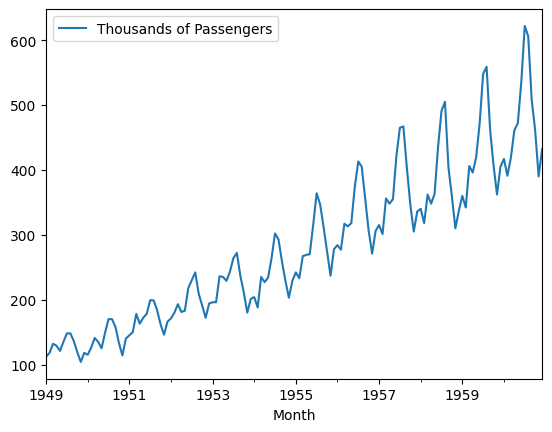

In [13]:
df_airline.plot()

In [14]:
from statsmodels.tsa.stattools import adfuller

In [15]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [16]:
adf_test(df_airline['Thousands of Passengers'])

ADF Statistics: 0.8153688792060447
p- value: 0.9918802434376409
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [17]:
## Use Techniques Differencing
df_airline['Passengers First Difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(1)

In [18]:
df_airline.head()

,Thousands of Passengers,Passengers First Difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


In [19]:
adf_test(df_airline['Passengers First Difference'].dropna())

ADF Statistics: -2.8292668241699794
p- value: 0.05421329028382823
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [20]:
## Use Techniques Differencing
df_airline['Passengers Second Difference']=df_airline['Passengers First Difference']-df_airline['Passengers First Difference'].shift(1)

In [21]:
adf_test(df_airline['Passengers Second Difference'].dropna())

ADF Statistics: -16.38423154246855
p- value: 2.732891850013926e-29
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [22]:
### 12 months 
## Use Techniques Differencing
df_airline['Passengers 12 Difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(12)

In [23]:
adf_test(df_airline['Passengers 12 Difference'].dropna())

ADF Statistics: -3.3830207264924805
p- value: 0.011551493085514978
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [24]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

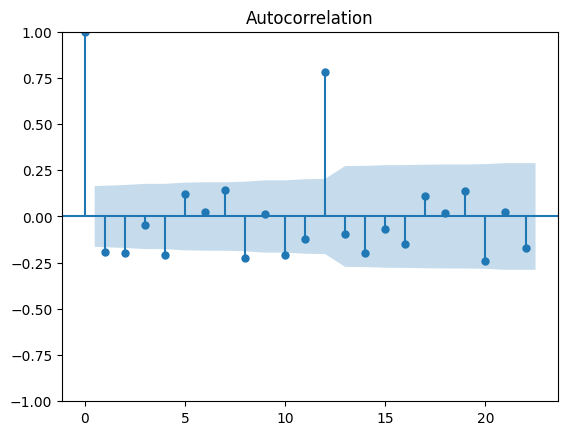

In [25]:
acf = plot_acf(df_airline["Passengers Second Difference"].dropna())

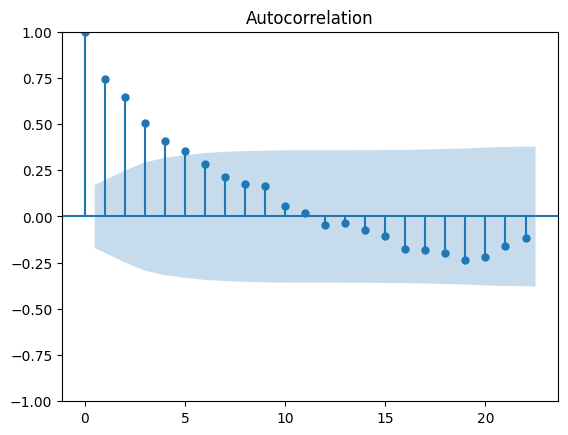

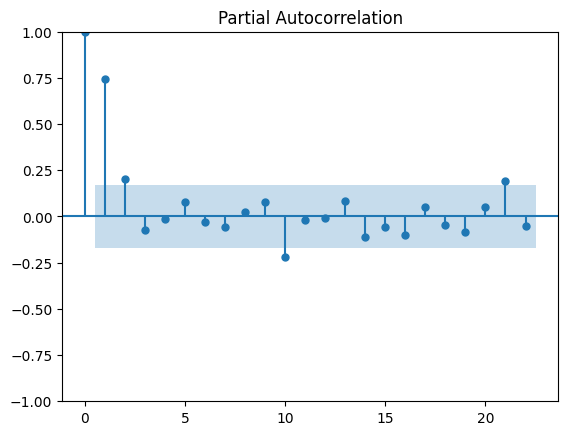

In [26]:
acf12 = plot_acf(df_airline["Passengers 12 Difference"].dropna())
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

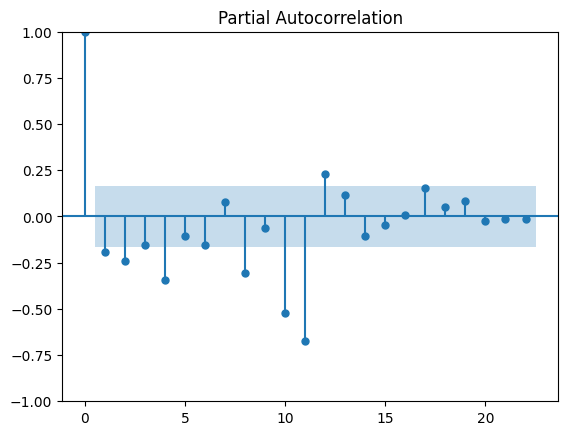

In [27]:
result = plot_pacf(df_airline["Passengers Second Difference"].dropna())

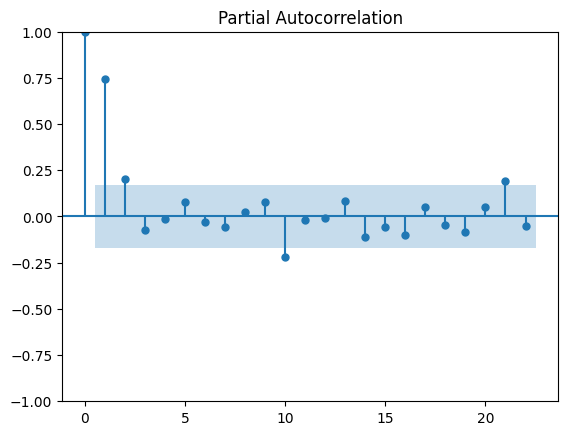

In [28]:
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

In [29]:
### split train and test data
df_airline

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606.0,-16.0,-103.0,47.0
1960-09-01,508.0,-98.0,-82.0,45.0
1960-10-01,461.0,-47.0,51.0,54.0


In [30]:
from datetime import datetime,timedelta
train_dataset_end=datetime(1955,12,1)
test_dataset_end=datetime(1960,12,1)

In [31]:
train_data=df_airline[:train_dataset_end]
test_data=df_airline[train_dataset_end+timedelta(days=1):test_dataset_end]

In [32]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [33]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


In [38]:
## create a ARIMA model
from statsmodels.tsa.arima.model import ARIMA

In [35]:
train_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1955-08-01,347.0,-17.0,-66.0,54.0
1955-09-01,312.0,-35.0,-18.0,53.0
1955-10-01,274.0,-38.0,-3.0,45.0


In [39]:
# Assuming train_data['Thousands of Passengers'] is your time series data
# Specify the order of the ARIMA model (p, d, q)
order = (14, 2, 12)
model_ARIMA = ARIMA(train_data['Thousands of Passengers'], order=order)

/Users/mowlanica.billa/Desktop/Desktop/Data_Science/Projects/Time_series/End_to_End_practice/time_series/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/mowlanica.billa/Desktop/Desktop/Data_Science/Projects/Time_series/End_to_End_practice/time_series/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/mowlanica.billa/Desktop/Desktop/Data_Science/Projects/Time_series/End_to_End_practice/time_series/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [40]:
model_Arima_fit=model_ARIMA.fit()

/Users/mowlanica.billa/Desktop/Desktop/Data_Science/Projects/Time_series/End_to_End_practice/time_series/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/mowlanica.billa/Desktop/Desktop/Data_Science/Projects/Time_series/End_to_End_practice/time_series/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/mowlanica.billa/Desktop/Desktop/Data_Science/Projects/Time_series/End_to_End_practice/time_series/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [41]:
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Thousands of Passengers   No. Observations:                   84
Model:                    ARIMA(14, 2, 12)   Log Likelihood                -306.049
Date:                     Fri, 21 Jun 2024   AIC                            666.097
Time:                             13:15:19   BIC                            731.079
Sample:                         01-01-1949   HQIC                           692.186
                              - 12-01-1955                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7416      5.568     -0.133      0.894     -11.655      10.172
ar.L2         -0.2026      9.015     -0.022      0.982     -17.873      17.467
ar.L3         -0.2549      9.039     -0.028      0.978     -17.971      17.461
ar.L4         -0.2469      8.951     -0.028      0.978     -17.790      17.297
ar.L5         -0.2915      8.825     -0.033      0.974     -17.589      17.006
ar.L6         -0.1971      8.934     -0.022      0.982     -17.707      17.312
ar.L7         -0.2634      8.522     -0.031      0.975     -16.966      16.439
ar.L8         -0.3338      8.528     -0.039      0.969     -17.048      16.380
ar.L9         -0.2617      8.948     -0.029      0.977     -17.799      17.276
ar.L10        -0.2968      8.913     -0.033      0.973     -17.765      17.172
ar.L11        -0.1215      9.050     -0.013      0.989     -17.859      17.616
ar.L12         0.5781      8.238      0.070      0.944     -15.569      16.725
ar.L13         0.5039      3.766      0.134      0.894      -6.877       7.885
ar.L14        -0.0673      0.489     -0.138      0.891      -1.025       0.890
ma.L1         -0.4303      5.597     -0.077      0.939     -11.401      10.540
ma.L2         -0.5971      2.729     -0.219      0.827      -5.945       4.751
ma.L3         -0.0807      1.325     -0.061      0.951      -2.678       2.517
ma.L4          0.1334      1.987      0.067      0.946      -3.762       4.028
ma.L5          0.2006      1.059      0.189      0.850      -1.875       2.276
ma.L6         -0.2719      0.557     -0.488      0.626      -1.364       0.821
ma.L7          0.2252      1.143      0.197      0.844      -2.015       2.465
ma.L8         -0.2831      0.539     -0.526      0.599      -1.339       0.773
ma.L9          0.2499      1.405      0.178      0.859      -2.504       3.004
ma.L10        -0.1054      0.709     -0.149      0.882      -1.496       1.285
ma.L11        -0.3110      0.749     -0.415      0.678      -1.779       1.157
ma.L12         0.2993      1.859      0.161      0.872      -3.344       3.942
sigma2        73.4645     28.053      2.619      0.009      18.481     128.448
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 3.46
Prob(Q):                              0.80   Prob(JB):                         0.18
Heteroskedasticity (H):               2.14   Skew:                             0.50
Prob(H) (two-sided):                  0.05   Kurtosis:                         2.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [42]:
# Assuming train_data['Thousands of Passengers'] is your time series data
# Specify the order of the ARIMA model (p, d, q)
order = (10, 2, 0)
model_ARIMA = ARIMA(train_data['Thousands of Passengers'], order=order)

/Users/mowlanica.billa/Desktop/Desktop/Data_Science/Projects/Time_series/End_to_End_practice/time_series/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/mowlanica.billa/Desktop/Desktop/Data_Science/Projects/Time_series/End_to_End_practice/time_series/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/mowlanica.billa/Desktop/Desktop/Data_Science/Projects/Time_series/End_to_End_practice/time_series/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [43]:
model_Arima_fit=model_ARIMA.fit()

In [44]:
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Thousands of Passengers   No. Observations:                   84
Model:                     ARIMA(10, 2, 0)   Log Likelihood                -357.239
Date:                     Fri, 21 Jun 2024   AIC                            736.477
Time:                             13:17:24   BIC                            762.951
Sample:                         01-01-1949   HQIC                           747.106
                              - 12-01-1955                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5166      0.121     -4.262      0.000      -0.754      -0.279
ar.L2         -0.7204      0.121     -5.940      0.000      -0.958      -0.483
ar.L3         -0.4857      0.125     -3.876      0.000      -0.731      -0.240
ar.L4         -0.7505      0.129     -5.819      0.000      -1.003      -0.498
ar.L5         -0.5062      0.169     -2.991      0.003      -0.838      -0.175
ar.L6         -0.5200      0.141     -3.683      0.000      -0.797      -0.243
ar.L7         -0.3051      0.143     -2.127      0.033      -0.586      -0.024
ar.L8         -0.5939      0.155     -3.833      0.000      -0.898      -0.290
ar.L9         -0.2963      0.132     -2.241      0.025      -0.555      -0.037
ar.L10        -0.4825      0.110     -4.376      0.000      -0.699      -0.266
sigma2       336.0939     66.064      5.087      0.000     206.612     465.576
===================================================================================
Ljung-Box (L1) (Q):                  10.86   Jarque-Bera (JB):                 1.24
Prob(Q):                              0.00   Prob(JB):                         0.54
Heteroskedasticity (H):               2.85   Skew:                             0.24
Prob(H) (two-sided):                  0.01   Kurtosis:                         2.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [45]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


In [46]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [47]:
pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['Thousands of Passengers']-pred

In [48]:
pred

1956-01-01    300.183614
1956-02-01    309.478357
1956-03-01    316.443014
1956-04-01    307.827542
1956-05-01    318.544233
1956-06-01    348.922084
1956-07-01    366.020291
1956-08-01    346.567537
1956-09-01    332.120968
1956-10-01    307.734753
1956-11-01    311.623911
1956-12-01    339.828198
1957-01-01    349.840410
1957-02-01    356.098236
1957-03-01    350.687827
1957-04-01    350.080463
1957-05-01    361.157695
1957-06-01    381.216520
1957-07-01    382.319380
1957-08-01    372.852583
1957-09-01    364.110096
1957-10-01    356.108925
1957-11-01    371.293791
1957-12-01    385.323600
1958-01-01    392.077843
1958-02-01    391.405854
1958-03-01    388.404581
1958-04-01    391.572859
1958-05-01    402.448084
1958-06-01    413.255691
1958-07-01    410.853421
1958-08-01    407.670547
1958-09-01    402.486337
1958-10-01    406.089150
1958-11-01    418.125318
1958-12-01    426.012382
1959-01-01    429.205587
1959-02-01    427.352235
1959-03-01    428.150991
1959-04-01    432.790852


In [49]:
residuals

Month
1956-01-01    -16.183614
1956-02-01    -32.478357
1956-03-01      0.556986
1956-04-01      5.172458
1956-05-01     -0.544233
1956-06-01     25.077916
1956-07-01     46.979709
1956-08-01     58.432463
1956-09-01     22.879032
1956-10-01     -1.734753
1956-11-01    -40.623911
1956-12-01    -33.828198
1957-01-01    -34.840410
1957-02-01    -55.098236
1957-03-01      5.312173
1957-04-01     -2.080463
1957-05-01     -6.157695
1957-06-01     40.783480
1957-07-01     82.680620
1957-08-01     94.147417
1957-09-01     39.889904
1957-10-01     -9.108925
1957-11-01    -66.293791
1957-12-01    -49.323600
1958-01-01    -52.077843
1958-02-01    -73.405854
1958-03-01    -26.404581
1958-04-01    -43.572859
1958-05-01    -39.448084
1958-06-01     21.744309
1958-07-01     80.146579
1958-08-01     97.329453
1958-09-01      1.513663
1958-10-01    -47.089150
1958-11-01   -108.125318
1958-12-01    -89.012382
1959-01-01    -69.205587
1959-02-01    -85.352235
1959-03-01    -22.150991
1959-04-01    -36.7

<Axes: ylabel='Density'>

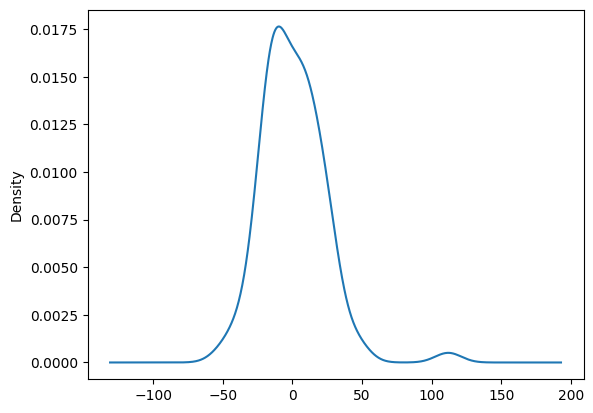

In [50]:
model_Arima_fit.resid.plot(kind='kde')

In [51]:
test_data['Predicted_ARIMA']=pred

/var/folders/bk/1644ckzd4z1_dg2l6_nrn3cr0000gp/T/ipykernel_91991/95659616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA']=pred


<Axes: xlabel='Month'>

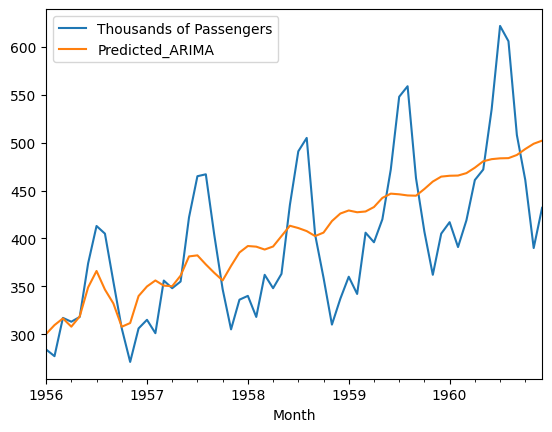

In [52]:
test_data[['Thousands of Passengers','Predicted_ARIMA']].plot()

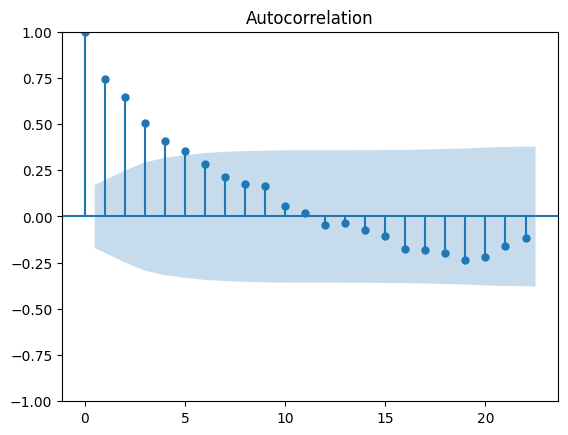

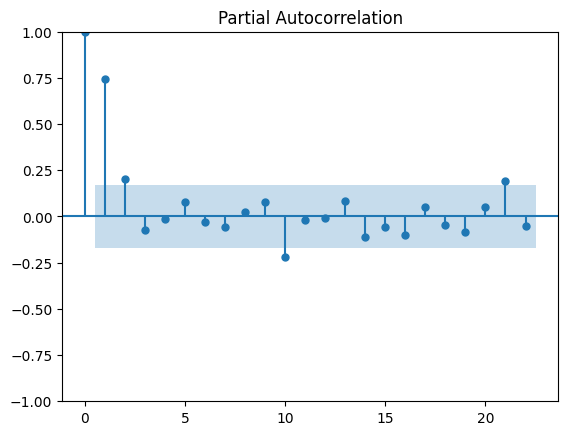

In [53]:
acf12 = plot_acf(df_airline["Passengers 12 Difference"].dropna())
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

In [54]:
## create a SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [55]:
model_SARIMA=SARIMAX(train_data['Thousands of Passengers'],order=(3,0,5),seasonal_order=(0,1,0,12))

/Users/mowlanica.billa/Desktop/Desktop/Data_Science/Projects/Time_series/End_to_End_practice/time_series/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/mowlanica.billa/Desktop/Desktop/Data_Science/Projects/Time_series/End_to_End_practice/time_series/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [56]:
model_SARIMA_fit=model_SARIMA.fit()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.18261D+00    |proj g|=  4.32163D-02

At iterate    5    f=  3.17613D+00    |proj g|=  3.18801D-02

At iterate   10    f=  3.17248D+00    |proj g|=  2.87532D-03

At iterate   15    f=  3.16990D+00    |proj g|=  1.51288D-02

At iterate   20    f=  3.16245D+00    |proj g|=  1.30209D-02

At iterate   25    f=  3.15869D+00    |proj g|=  3.72985D-03

At iterate   30    f=  3.15804D+00    |proj g|=  2.73647D-03

At iterate   35    f=  3.15800D+00    |proj g|=  5.65079D-04

At iterate   40    f=  3.15797D+00    |proj g|=  4.49954D-03

At iterate   45    f=  3.15779D+00    |proj g|=  6.20922D-03

At iterate   50    f=  3.15763D+00    |proj g|=  1.50465D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/mowlanica.billa/Desktop/Desktop/Data_Science/Projects/Time_series/End_to_End_practice/time_series/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [57]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:             Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(3, 0, 5)x(0, 1, [], 12)   Log Likelihood                -265.241
Date:                             Fri, 21 Jun 2024   AIC                            548.481
Time:                                     13:18:08   BIC                            568.971
Sample:                                 01-01-1949   HQIC                           556.638
                                      - 12-01-1955                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5993      0.939      0.639      0.523      -1.240       2.439
ar.L2          0.8313      0.232      3.577      0.000       0.376       1.287
ar.L3         -0.4537      0.895     -0.507      0.612      -2.208       1.300
ma.L1          0.1827      1.167      0.156      0.876      -2.105       2.471
ma.L2         -0.5353      1.266     -0.423      0.672      -3.016       1.945
ma.L3         -0.0985      0.385     -0.256      0.798      -0.853       0.656
ma.L4         -0.1271      0.338     -0.376      0.707      -0.790       0.536
ma.L5          0.2472      0.357      0.692      0.489      -0.453       0.948
sigma2        87.7195     81.396      1.078      0.281     -71.814     247.253
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.68
Prob(Q):                              0.88   Prob(JB):                         0.26
Heteroskedasticity (H):               2.05   Skew:                             0.46
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [58]:
test_data.tail()

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_ARIMA
Month,,,,,
1960-08-01,606.0,-16.0,-103.0,47.0,483.883988
1960-09-01,508.0,-98.0,-82.0,45.0,487.184111
1960-10-01,461.0,-47.0,51.0,54.0,493.432794
1960-11-01,390.0,-71.0,-24.0,28.0,498.930084
1960-12-01,432.0,42.0,113.0,27.0,502.159836


In [59]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [60]:
pred_Sarima=model_SARIMA_fit.predict(start=datetime(1956,6,6),end=datetime(1960,12,1))
residuals=test_data['Thousands of Passengers']-pred_Sarima

<Axes: xlabel='Month'>

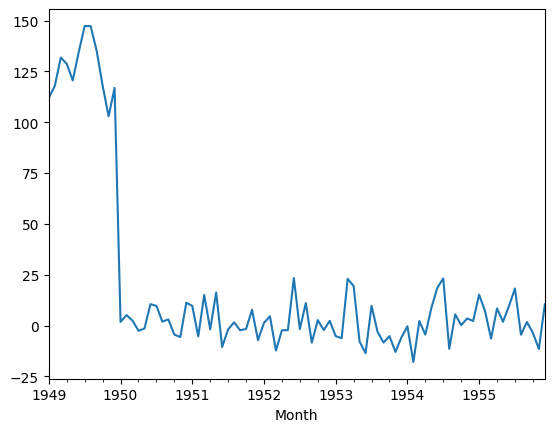

In [61]:
model_SARIMA_fit.resid.plot()

<Axes: ylabel='Density'>

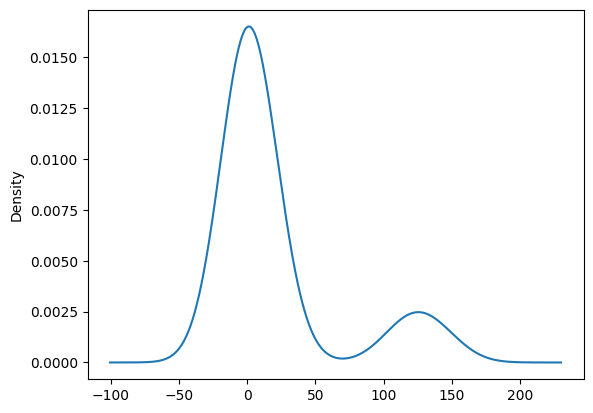

In [62]:
model_SARIMA_fit.resid.plot(kind='kde')

In [63]:
test_data['Predicted_SARIMA']=pred_Sarima

/var/folders/bk/1644ckzd4z1_dg2l6_nrn3cr0000gp/T/ipykernel_91991/1367177785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_SARIMA']=pred_Sarima


In [64]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_ARIMA,Predicted_SARIMA
Month,,,,,,
1956-01-01,284.0,6.0,-35.0,42.0,300.183614,NaN
1956-02-01,277.0,-7.0,-13.0,44.0,309.478357,NaN
1956-03-01,317.0,40.0,47.0,50.0,316.443014,NaN
1956-04-01,313.0,-4.0,-44.0,44.0,307.827542,NaN
1956-05-01,318.0,5.0,9.0,48.0,318.544233,NaN
1956-06-01,374.0,56.0,51.0,59.0,348.922084,NaN
1956-07-01,413.0,39.0,-17.0,49.0,366.020291,403.400384
1956-08-01,405.0,-8.0,-47.0,58.0,346.567537,385.074559
1956-09-01,355.0,-50.0,-42.0,43.0,332.120968,349.447302


<Axes: xlabel='Month'>

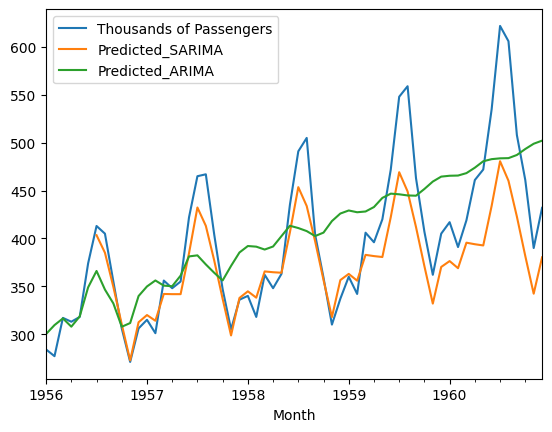

In [65]:
test_data[['Thousands of Passengers','Predicted_SARIMA','Predicted_ARIMA']].plot()